In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("..")
import AnalyzeSymAsym as asa

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE = Path("../SymAsymRNN") / "N100T100"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "cycshift • frobenius • asym1": pd.read_csv(
        BASE / "cycshift/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "shiftcycmh • frobenius • asym1": pd.read_csv(
        BASE / "shiftcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
}

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.174526,-0.000190,-1.622079,0.977686,3644.604602,0,9000
1,cycshift • frobenius • asym1,0,0.175491,-0.000206,-1.733573,0.978116,3362.517792,0,9000
2,shiftcycmh • frobenius • asym1,0,0.178339,-0.000183,-1.606004,0.984629,3788.776151,0,9000


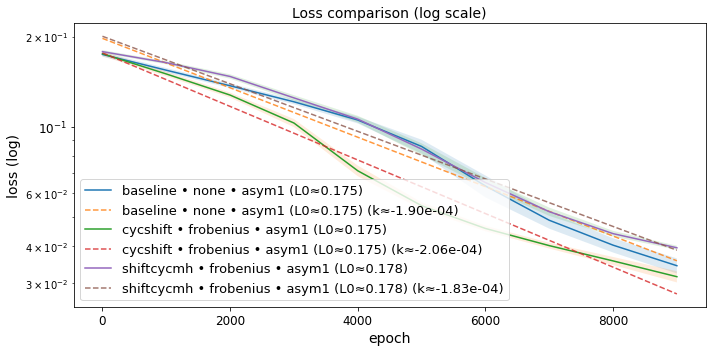

In [5]:
# Now overlay them
# asa.overlay_quick(conditions)
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(10, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.174526,NaN,NaN,NaN,NaN,0,9000
1,cycshift • frobenius • asym1,0,0.175491,NaN,NaN,NaN,NaN,0,9000
2,shiftcycmh • frobenius • asym1,0,0.178339,NaN,NaN,NaN,NaN,0,9000


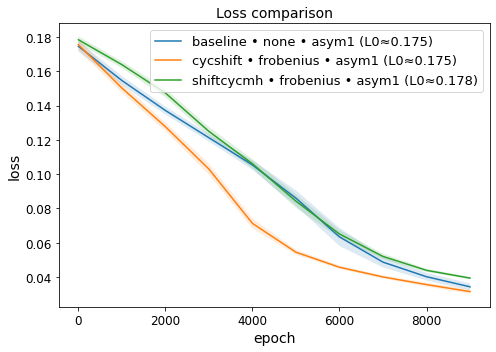

In [ ]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(7, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

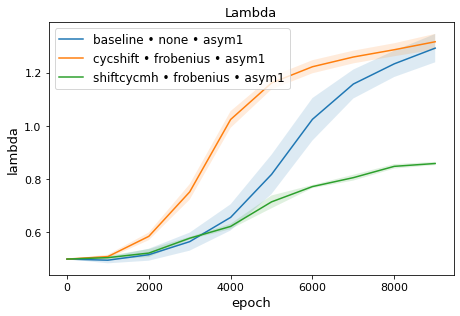

In [6]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(6.5, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)